In [94]:
from IPython.core.display import display, HTML

import numpy as np
means = np.load("data/means.npy").astype(np.float32)
covs = np.load("data/covs.npy").astype(np.float32)
xicovs = np.load("data/xicovs.npy").astype(np.float32)
signals = np.load("data/signals.npy").astype(np.float32)
A = np.load("data/A.npy").astype(np.float32)
dt = np.load("data/dt.npy")[0]
C = np.load("data/C.npy").astype(np.float32)
D = np.load("data/D.npy").astype(np.float32)

coeffs = [C, A, D , dt]



from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from misc import *
import tensorflow as tf
%load_ext autoreload
%autoreload 2

tfsignals = tf.convert_to_tensor(signals)[:100]
tfxicovs = tf.convert_to_tensor(xicovs)[:-1][:100]

#toysignals = tfsignals[:10][tf.newaxis,:,:]
#toyxicovs = tfxicovs[:10][tf.newaxis,:,:,:]
#inputs = (toyxicovs, toysignals)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
batched_signals = tf.stack(tf.split(tfsignals, 1)) 
batched_signals = batched_signals[:,:,:]
batched_xicovs  = tf.stack(tf.split(tfxicovs, 1))

inputs = (batched_xicovs, batched_signals)

In [97]:
from RNN_models import *

model = RecModel(coeffs)
preds = model(inputs)


inputs:  (<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[1.8165902, 0.       ],
        [0.       , 1.8165902]]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.01571522, -0.00512357]], dtype=float32)>)


states:  [<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 0.]], dtype=float32)>]
***


inputs:  (<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[1.8165902, 0.       ],
        [0.       , 1.8165902]]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.01571522, -0.00512357]], dtype=float32)>)


states:  [<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 0.]], dtype=float32)>]
***


inputs:  (<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[1.8165902e+00, 7.6296792e-04],
        [7.6296792e-04, 1.8165902e+00]]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.01813254, -0.02771763]], dtype=float32)>)


states:  [<tf.Tensor: shape=(1, 2), dtype=float32,

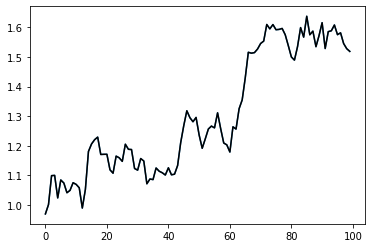

In [99]:
plt.plot(preds[0,:,0])
plt.plot(means[1:,0][:len(preds[0])],color="black")